<a href="https://colab.research.google.com/github/sway-am/Interpretability-of-CNN/blob/main/LIME_ON_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [35]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1,28,28,1)).astype('float32') / 255.0
x_test = x_test.reshape((-1,28,28,1)).astype('float32') / 255.0

In [36]:
import numpy as np
def to_rgb(x):
    x_rgb = np.zeros((x.shape[0], 28, 28, 3))
    for i in range(3):
        x_rgb[..., i] = x[..., 0]
    return x_rgb
x_train = to_rgb(x_train)
x_test = to_rgb(x_test)

In [37]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    keras.Input(shape=(28, 28, 3)),
    layers.Conv2D(16, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])


In [38]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 10)               

In [39]:
model.compile(
  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  optimizer=keras.optimizers.Adam(),
  metrics=['accuracy']
)

In [40]:
model.fit(
        x_train,
        y_train,
        epochs=2,
        batch_size=32,
        validation_data = (x_test, y_test))


Epoch 1/2
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1722 - accuracy: 0.9481 - val_loss: 0.0612 - val_accuracy: 0.9803
Epoch 2/2
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0610 - accuracy: 0.9816 - val_loss: 0.0434 - val_accuracy: 0.9858


In [41]:
# explaning model with LIME

In [43]:
!pip install lime

In [44]:
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import random

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 15ms/step


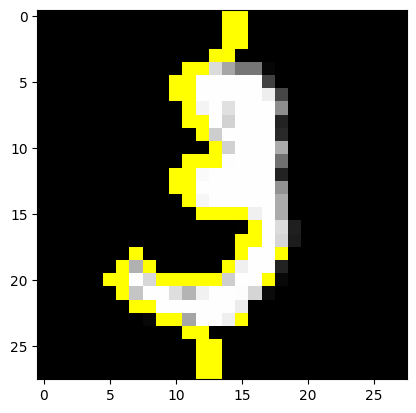

In [45]:
explainer = lime_image.LimeImageExplainer(random_state=42)
explanation = explainer.explain_instance(
         x_train[10],
         model.predict
)
plt.imshow(x_train[10])
image, mask = explanation.get_image_and_mask(
         model.predict(
              x_train[10].reshape((1,28,28,3))
         ).argmax(axis=1)[0],
         positive_only=True,
         hide_rest=False)
plt.imshow(mark_boundaries(image, mask))

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


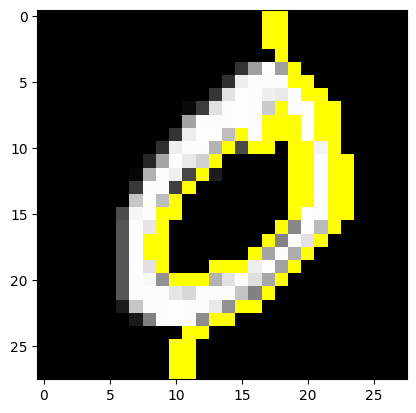

In [48]:
explainer = lime_image.LimeImageExplainer(random_state=42)
explanation = explainer.explain_instance(
         x_train[1],
         model.predict
)
plt.imshow(x_train[1])
image, mask = explanation.get_image_and_mask(
         model.predict(
              x_train[1].reshape((1,28,28,3))
         ).argmax(axis=1)[0],
         positive_only=True,
         hide_rest=False)
plt.imshow(mark_boundaries(image, mask))